# Energy time series
This code will generate a plot of energy time series in each iteration of metropolis algorithm

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## Define parameters

N = size of a lattics (NxN nodes)
Q = number of iterations
J = coupling constant

In [6]:
N = 200; Q = 10000; J = 1
Tmin = 0.5; Tmax = 3; dT = 0.5; 

## Iterative part

In [7]:
energy_series = []
magnet_series = []
for temp in np.arange(Tmin,Tmax+dT,dT): #Change T in each iterations, T is from range of Tmin to Tmax
    kbT = temp
    a = np.ceil(np.random.random((N,N))*2)*2 -3
    # a= a/a #Uncomment this part, should you want an homogeneous initial condition
    energy_ite_array = np.arange(Q)
    magnet_ite_array = np.arange(Q)
    for q in range(Q):
        r0 = np.random.randint(0,N,size=(N^2,2)) #Random indices to flip
        rn = np.mod(r0-1,N) #shift up or left
        rp = np.mod(r0+1,N) #shift down or right
        r = np.random.random((N^2,1))
        for n in range(0,N^2):
            energy_gap = 2*J*(a[rn[n,0],r0[n,1]] + a[rp[n,0],r0[n,1]] + a[r0[n,0],rn[n,1]] + a[r0[n,0],rp[n,1]])* a[r0[n,0],r0[n,1]]
            if r[n] < np.exp(-energy_gap/kbT):
                a[r0[n,0],r0[n,1]] = -a[r0[n,0],r0[n,1]]

        #Calculate a total energy in each iteration
        shifting = a #redundance, a could be use directly but define new variable for semantic reason
        energy_a = -1*(np.roll(shifting,-1,axis=0)+np.roll(shifting,1,axis=0)+np.roll(shifting,-1,axis=1)+np.roll(shifting,1,axis=1))*shifting
        energy_total = np.sum(energy_a)
        energy_ite_array[q] = energy_total

        #Magnetization #actually this is total magnetic moment
        magnetization = np.sum(a)
        magnet_ite_array[q] = magnetization

    energy_series.append(energy_ite_array)
    magnet_series.append(magnet_ite_array)

## Ploting part

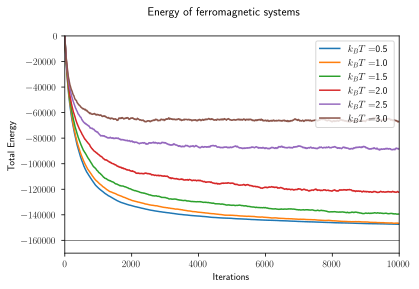

In [9]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(6, 4))

fig.suptitle('Energy of ferromagnetic systems')

ax1 = plt.subplot(1, 1, 1)
ax1.axis([0, 10000, -170000, 0])

for i in range(np.shape(np.arange(Tmin,Tmax+dT,dT))[0]):
    ax1.plot(energy_series[i], '-', label=r'$k_B T =$'+str(np.round(Tmin+i*dT, decimals=1)))

ax1.plot([0,10000],[-160000,-160000],color='k',lw=0.5)

ax1.set_xlabel(r'Iterations')
ax1.set_ylabel(r'Total Energy')
plt.legend(loc='best')

# plt.savefig('Magnetic.pdf') #uncomment this if you want to see 

plt.show()